In [1]:
import tensorflow as tf

# Loading-"MNIST Data Set"
## Containing Training Samples=60000 and Testing Samples=10000
### Tensorflow already contains MNIST Data set which can be loaded using Keras

In [2]:
#This is the handwritten characters dataset based on 28x28 sized images of 0 to 9
mnist=tf.keras.datasets.mnist

# After loading the MNIST Data set, dividing into train and test datasets:-

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

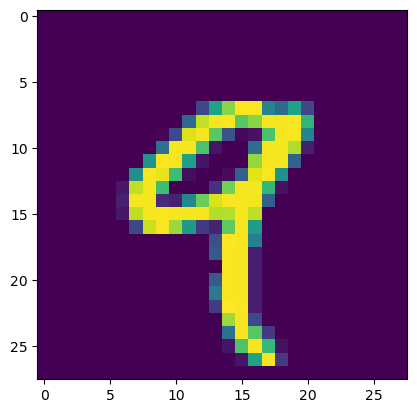

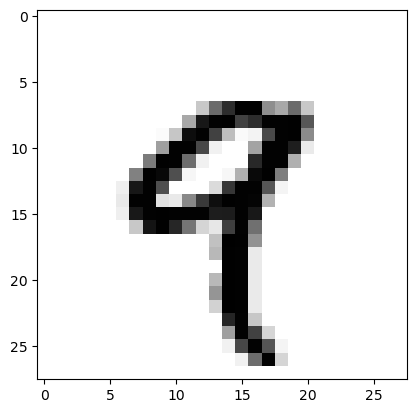

In [6]:
#to check how the data in graph looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[4])
plt.show() #in order to execute the graph
##however we don't know whether the image is color or binary
###so in order to plot it, we'll change the configuration
plt.imshow(x_train[4],cmap=plt.cm.binary)

# Checking the values of each pixel
## Before Normalization:-

In [7]:
print(x_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

## As images are in Gray level (1 channel ==> 0 to 255), not colored (RGB)

# Normalizing the data | Pre-processing step:-

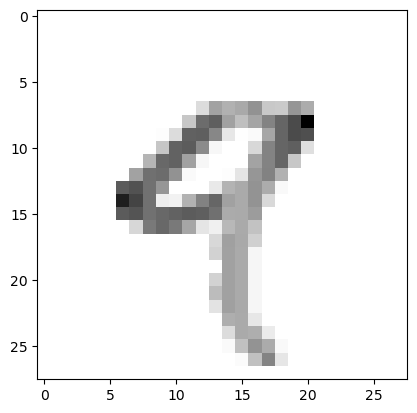

In [8]:
#gray image values varies from 0-255
#in order to normalize it, we can just divide the test and train arrays by 255, or just use the following method:-
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[4],cmap=plt.cm.binary)

## After Normalization:-

In [9]:
print(x_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[4]) #to check the corresponding label inside our network

9


# Resizing the image to make it suitable for applying the Convolution Operation:-

In [12]:
import numpy as np
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Dimensions of the Training samples->",x_trainr.shape)
print("Dimensions of the Testing samples->",x_testr.shape)

Dimensions of the Training samples-> (60000, 28, 28, 1)
Dimensions of the Testing samples-> (10000, 28, 28, 1)


# Creating a Deep Neural Network
### Training on 60000 samples of MNIST Handwritten data set:-

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Activation,Conv2D,MaxPooling2D,Activation

In [23]:
#Each filter or kernel is a neuron

#Creating a Neural Network
model=Sequential()

#First Convolution Layer {28-3+1=26} ---> {26*26} After naxpooling ---> {26/2=13}
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:])) #only for the first Convolution layer to mention input layer size
model.add(Activation("relu")) #Activation function to make it non-linear, for any values<0 it will remove them, and all values>0 will be allowed to go the next layer
model.add(MaxPooling2D(pool_size=(2,2))) #Max Pooling means it will get single max value of 2x2 matrix will be kept, rest will be dropped

#Second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Before using fully connected layer, we need to flatten the 2D array to 1D
model.add(Flatten())

#Fully Connected layer #1
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#Fully Connected layer #3 (Output must be equal to number of classes --> 10(0 to 9))
model.add(Dense(10)) #This last dense layer must be equal to 10
model.add(Activation("softmax")) #Activation function of the last layer is changed to softmax, it gives us the class probabilites
#if we have to perform Binary Classification (only two classes), then we'll have 1 Neuron in Dense layer and sigmoid as Activation function

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [26]:
print("Total Training Samples =",len(x_trainr))

Total Training Samples = 60000


In [27]:
#Compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [29]:
#Training the model
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 42s 30ms/step - loss: 0.3333 - accuracy: 0.8933 - val_loss: 0.1313 - val_accuracy: 0.9592
Epoch 2/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0973 - accuracy: 0.9707 - val_loss: 0.1178 - val_accuracy: 0.9636
Epoch 3/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.0683 - val_accuracy: 0.9795
Epoch 4/5
1313/1313 [==============================] - 45s 35ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0655 - val_accuracy: 0.9804
Epoch 5/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0662 - val_accuracy: 0.9806


In [30]:
#Evaluating results on MNIST's Testing dataset:-
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test Loss on 10000 Test Samples =>",test_loss)
print("Validation Accuracy on 10000 Test Samples =>",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0667 - accuracy: 0.9797
Test Loss on 10000 Test Samples => 0.06671005487442017
Validation Accuracy on 10000 Test Samples => 0.9797000288963318


In [31]:
#predicting results with the help of the model
predictions=model.predict([x_testr])

313/313 [==============================] - 2s 6ms/step


In [32]:
print(predictions) #all these predictions are based on Hot Encoding so these are only arrays

[[7.06491846e-07 7.36981474e-06 1.10325855e-05 ... 9.99960065e-01
  3.69937005e-08 6.92181493e-06]
 [3.58132948e-03 1.47481105e-05 9.95703161e-01 ... 4.77585054e-05
  5.54653292e-04 5.25139876e-06]
 [2.00044923e-08 9.99961138e-01 2.94128029e-08 ... 1.06557870e-07
  9.29392627e-07 1.62778221e-07]
 ...
 [2.14520623e-09 8.81962681e-09 4.37024994e-08 ... 2.32486150e-06
  9.76416118e-07 1.04888559e-05]
 [9.37585173e-06 3.03377341e-08 4.32769064e-11 ... 4.71212930e-11
  9.23607502e-08 3.04652303e-07]
 [7.69433086e-07 2.47266541e-09 1.04120623e-07 ... 6.47625842e-10
  1.18106499e-07 3.96300877e-08]]


In [47]:
#To convert the predictions from Hot Encoding, we use numpy
print(np.argmax(predictions[4])) #argmax will return the max value index and find its value

4


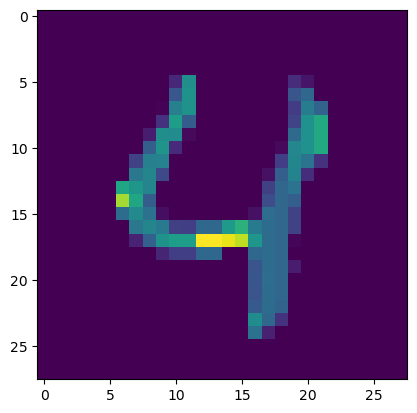

In [48]:
plt.imshow(x_test[4]) #checking if our answer is true or not

In [49]:
import cv2

In [81]:
#Command to load an image:-
image=cv2.imread('se7en.png')

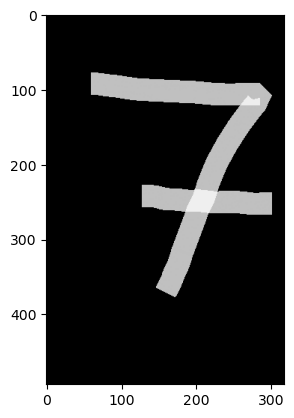

In [82]:
plt.imshow(image)

In [83]:
image.shape

(494, 318, 3)

In [84]:
#Converting color image to gray image:-
grayimage=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [85]:
grayimage.shape

(494, 318)

In [86]:
#Resizing the image:-
resizedimage=cv2.resize(grayimage,(28,28),interpolation=cv2.INTER_AREA)

In [87]:
resizedimage.shape

(28, 28)

In [88]:
#Before submitting the image to the Neural Network, we normalize it
newimage=tf.keras.utils.normalize(resizedimage,axis=1) #scaling from 0-1

In [89]:
newimage=np.array(newimage).reshape(-1,img_size,img_size,1) #Kernel operation of Convolutional Layer

In [90]:
newimage.shape

(1, 28, 28, 1)

In [91]:
predictions=model.predict(newimage)

1/1 [==============================] - 0s 20ms/step


In [92]:
print("The Handwritten Digit recognized by the model is ====> ",np.argmax(predictions))

The Handwritten Digit recognized by the model is ====>  7


# HANDWRITTEN CHARACTER RECOGNITION IN A VIDEO

In [98]:
import numpy as np
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

cap=cv2.VideoCapture('Record_2022_11_27_02_09_47_899_Trim.mp4')
#cap.set(cv2.CAP_PROP_FPS,170)
#Check if the webcam is open correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open or play the video!")

text="Random text in a board"
#Getting the width and height of the text board:-
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
#Setting the text start position:-
text_offset_x=10
text_offset_y=image.shape[0]-25
#Making the coordinates of the board with a small padding of two pixels
box_co=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
#cv2.rectangle(image,box_co[0],box_co[1],rectangle_bgr,cv2.FILLED)
#cv2.putText(image,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)
counter=0;
while True:
    ret,frame=cap.read()
    counter=counter+1
    if(counter%2==0):
        grayimage=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        resizedimage=cv2.resize(grayimage,(28,28),interpolation=cv2.INTER_AREA)
        newimage=tf.keras.utils.normalize(resizedimage,axis=1)
        newimage=np.array(newimage).reshape(-1,img_size,img_size,1)
        predictions=model.predict(newimage)
        Status=np.argmax(predictions)
        
        print(Status)
        print(type(Status))
        
        x1,y1,w1,h1=0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,255,0),-1)
        #Add text
        cv2.putText(frame,Status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        #grayimage=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        #print(faceCascade.empty())
        #faces=faceCascade.detectMultiScale(grayimage,1.1,4)
        
        #Draw a rectangle around the faces
        #for(x,y,w,h) in faces:
            #cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        #use putText() method for inserting text in the video
        
        cv2.imshow("The Handwritten Digit recognized by the model is ====> ",frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 20ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 22ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
6
<class 'numpy.int64'>
1/1 [==============================] - 0s 21ms/step
6
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 18ms/step
1
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
5
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 20ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
4
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
4
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 20ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
3
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
3
<class 'numpy.int64'>
1/1 [=======

1/1 [==============================] - 0s 18ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 19ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 20ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 17ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
8
<class 'numpy.int64'>
1/1 [==============================] - 0s 18ms/step
8
<class 'numpy.int64'>
1/1 [=======

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
